In [1]:
from baseline_cnn import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'models/95_3743accu.pt'
path

'models/95_3743accu.pt'

In [3]:
use_cuda = torch.cuda.is_available()

# Setup GPU optimization if CUDA is supported
if use_cuda:
    computing_device = torch.device("cuda")
    extras = {"num_workers": 1, "pin_memory": True}
    print("CUDA is supported")
else: # Otherwise, train on the CPU
    computing_device = torch.device("cpu")
    extras = False
    print("CUDA NOT supported")

CUDA is supported


In [4]:
model=Nnet()
model.load_state_dict(torch.load(path))

# if torch.cuda.device_count() > 1:
#     print("Let's use", torch.cuda.device_count(), "GPUs!")
#     model = nn.DataParallel(model)

model.to(computing_device)
# model=Nmodel().to(computing_device)
# model.apply(weights_init)

# Print the model
model.eval()
print(model)

Nnet(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [5]:
print(model.modules())

<generator object Module.modules at 0x7f3dbcf12620>


In [6]:
for idx, m in enumerate(model.modules()):
    if idx == 2:
#         print(idx, m)
        
#         inputs = utils.make_grid(m.weight.cpu().data, normalize=True)
        
        filters = m.weight.cpu().data.numpy()
#         print(filters, filters.shape)
#         print(filters[1])
        mins = np.min(filters, axis=0)
        maxs = np.max(filters, axis=0)
        kernels = (filters - mins) / (maxs - mins)
#         print(kernels)
        
        break

In [7]:
filters[:, :, :, 1][0]

array([[-8.0478363e-02, -4.1982349e-02,  8.0723586e-03],
       [ 9.0734902e-05,  1.6003633e-02,  3.7355617e-02],
       [ 5.7178963e-04,  5.5707473e-02,  5.7426270e-02]], dtype=float32)

In [8]:
kernels = kernels * 255

In [9]:
kers = kernels
kers[0]

array([[[  0.      ,  75.560745, 101.20993 ],
        [113.419785,  80.82416 ,  92.55062 ],
        [139.93652 , 128.40671 , 112.7401  ]],

       [[138.16386 , 144.69168 ,  51.61526 ],
        [126.969505, 141.25417 ,  72.25195 ],
        [181.20486 , 147.90707 , 171.56464 ]],

       [[144.38887 , 153.9287  , 108.65841 ],
        [ 51.545834, 200.07333 , 129.82936 ],
        [170.21594 , 206.00676 , 194.27937 ]]], dtype=float32)

In [10]:
kernels = kernels.astype('int')
kernels

array([[[[  0,  75, 101],
         [113,  80,  92],
         [139, 128, 112]],

        [[138, 144,  51],
         [126, 141,  72],
         [181, 147, 171]],

        [[144, 153, 108],
         [ 51, 200, 129],
         [170, 206, 194]]],


       [[[220, 187, 139],
         [248, 199, 125],
         [166, 158, 122]],

        [[213, 218, 149],
         [225, 188, 114],
         [ 92,  61, 155]],

        [[163, 169,  76],
         [142, 129, 127],
         [ 59,   6,  10]]],


       [[[ 31,  67,  63],
         [ 46, 125,  59],
         [121, 158,  70]],

        [[172, 106, 133],
         [212, 136, 104],
         [179, 141, 133]],

        [[ 53, 101,  89],
         [117,  98, 123],
         [151, 167,  63]]],


       ...,


       [[[111, 187, 196],
         [255, 163,  92],
         [255, 131,  74]],

        [[  0,  73, 138],
         [ 48,   0,   0],
         [ 78,  15,  11]],

        [[ 68, 183, 227],
         [ 97, 117, 139],
         [141, 154, 127]]],


       [[[ 56,  99

In [11]:
im1 = kernels[:, :, :, 1][0]
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

fnums = [i for i in range(64)]

In [ ]:
[i]

In [ ]:
for i in range(n_filters):
	# get the filter
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1

In [40]:
kernels.shape

(64, 3, 3, 3)

In [47]:
def visualizeFilter(m):
    fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(14, 14),
                            subplot_kw={'xticks': [], 'yticks': []})

    interp_method = methods[-m]
    
    ch = 0
    fnum = 0
    for ax, fn in zip(axs.flat, fnums):
        ax.imshow(kernels[:, ch, :, :][fnum], interpolation=interp_method, cmap='gray')
#         ax.set_title('filter ' + str(fnum))
        ch += 1
        if ch == 3:
            ch = 0
            fnum += 1

    plt.tight_layout()
    plt.savefig('CNN_top10_filters.png')
    plt.show()
    print(fnum)

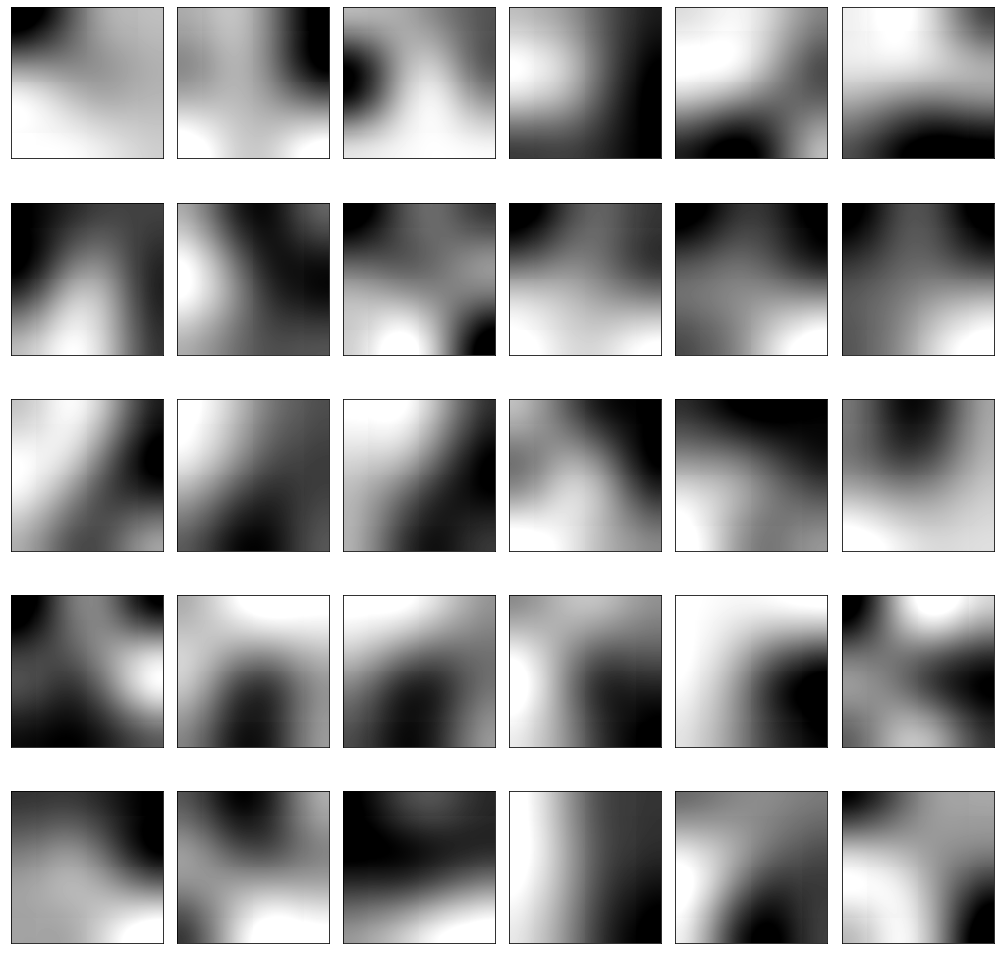

10


In [48]:
visualizeFilter(4)

In [ ]:
visualizeFilter()

In [138]:
kernels[:, 0, :, :].shape

(64, 3, 3)

In [155]:
kernels[:, :, :, 1][0]

array([[250, 193,  98],
       [214, 135,  83],
       [253, 155, 123]])

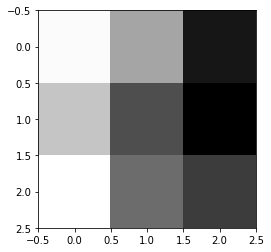

In [37]:
imshow(kernels[:, :, :, 1][0].astype('int'), cmap='gray')

In [147]:
imshow(kernels[:, :, :, 3], cmap='gray')

IndexError: index 3 is out of bounds for axis 3 with size 3

In [127]:
i = 1

In [128]:
figs = np.concatenate((kernels[:, :, :, i][0], kernels[:, :, :, i][1], kernels[:, :, :, i][2]), axis=1)


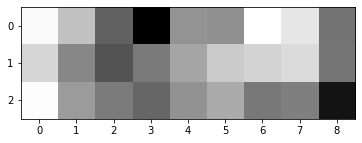

In [131]:
imshow(figs, cmap='gray')

In [68]:
np.concatenate((kernels[:, :, :, i][0], kernels[:, :, :, i][1])).shape

(6, 3)

In [64]:
figs.shape

(3, 9)

In [66]:
kernels[:, :, :, i][1]

array([[0.        , 0.57799786, 0.56511235],
       [0.47669145, 0.6471491 , 0.79767543],
       [0.4028623 , 0.57493573, 0.67367667]], dtype=float32)

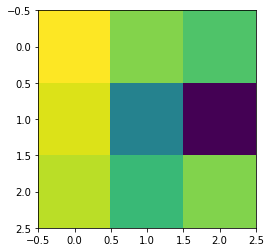

In [60]:
figs = 
for i in range(kernels.shape[3]):
    filter = kernels[:, :, :, i][0]
    imshow(filter)

In [ ]:
img = transforms.ToPILImage()(images[n].cpu()).convert("RGB")

cls = labels[n].item()
print(cls, label_names[pred])
imshow(img)

In [29]:
filter_imgs = []
# Get the weights for each needed filter
for idx, m in enumerate(model.modules()):
    if idx == 2:     
        #early filters
        early = (m.weight.cpu().data.numpy()[1])[0]  
        early2 = (m.weight.cpu().data.numpy()[4])[0]
        filter_imgs.append(early)
        filter_imgs.append(early2)
        
    if idx == 5:
        # middle filters
        middle = (m.weight.cpu().data.numpy()[1])[0]
        middle2 = (m.weight.cpu().data.numpy()[4])[0]
        filter_imgs.append(middle)
        filter_imgs.append(middle2)
    
    if idx == 8:
        # late filters
        late = (m.weight.cpu().data.numpy()[1])[0]
        late2 = (m.weight.cpu().data.numpy()[4])[0]
        filter_imgs.append(late)
        filter_imgs.append(late2)
        break

In [31]:
filter_imgs[0]

array([[-0.03449037, -0.08094835, -0.05130576],
       [-0.08678938, -0.00526978,  0.04787042],
       [-0.03032217, -0.00011265,  0.04518237]], dtype=float32)

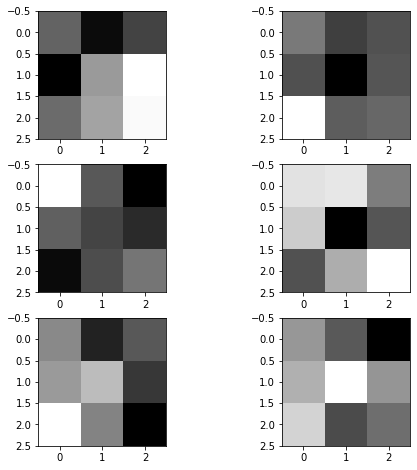

In [30]:
fig = plt.figure(figsize=(8, 8))
cols = 2
rows = 3

for i in range(1, cols * rows + 1):
    img = filter_imgs[i-1]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img, cmap='gray')
    
plt.savefig('CNN_filters.png')

In [ ]:
df = loader('test.csv','/datasets/cs154-fa19-public/')
df_tst = dataset.frame

classes = []
classes.append('no classes for label 0')
c = 0
for images, labels in df:
#     class_labels.append(labels)
#     print(dataset[0])
    
    print(images.filename.find('test/'))
    if c == 0:
        break
df_tst.head()

In [ ]:
for path in df_tst.path:
#     print(path)
    i = path.find('test/') + 5
    name = path[i:]
#     print(name)
    j = name.find('/')
    name = name[:j]
#     print(name)
    if not name in classes:
        classes.append(name)
        
df_tst.label.value_counts().to_dict()

In [ ]:
def report_metrics(best5, overall=False):
    
    #display average overall metrics
    if overall:
        dosomething
        
    
    if best5:
        #display metrics for top 5 classes
        hi
    else:
        #display metrics for worst 5 classes
        hi
        
    

In [ ]:
def update_score(t, y):
    '''
    t: ground truth
    y: predicted label
    '''
    TP[t]
    
    
    

In [ ]:
# print(len(test_loader))
classes_right = [0] * 201
# classes_right[0] = 1
# class_images = []
# for images, labels in dataset:
#     class_labels.append(labels)
# #     class_images.append(images)
    
# # print(np.amax(class_labels), np.amin(class_labels))
# # c = 0

# self.model = model 
# Since if the model is wrapped by the `DataParallel` class, you won't be able to access its attributes
# unless you write `model.module` which breaks the code compatibility. We use `model_attr_accessor` for attributes
# accessing only.
# model = model.module

classes_count = [0] * 201
# print(classes_count, len(classes_count))
# print(classes_count)



pred_classes = []
accu = 0
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader, 0):
        images, labels = images.to(device), labels.to(device)
        y = model(images)
        t = labels.item()
        classes_count[t] += 1
        y_i = torch.argmax(y).item()
        pred_classes.append(y_i)
#         print(i)
#         print(images)
#         print(labels)
#         print(labels.item())
        if t == y_i:
            accu += 1
            classes_right[t] += 1
            
# print(pred_classes)
print(np.amax(pred_classes), np.amin(pred_classes))
# # print(y)
# # print(torch.argmax(y).item())
print("accuracy: ", (accu/len(dataset)))
print(accu)
classes_accu = np.array(classes_right[1:]) / np.array(classes_count[1:])
#b = best, w = worst
b = np.argmax(classes_accu)
w = np.argmin(classes_accu)

print("best class performace with (accuracy): ", b+1, "(" + str(classes_accu[b]) + ")", np.amax(classes_accu), " --- " + str(classes_right[b+1]) + "/" + str(classes_count[b+1]) + " right")

print("worst class performace with (accuracy): ", w+1, "(" + str(classes_accu[w]) + ")", np.amin(classes_accu), " --- " + str(classes_right[w+1]) + "/" + str(classes_count[w+1]) + " right")